Нуралиев Расим. Группа ПИ19-4

**Вариант 16**

## Task 5

Задание 5. Линейное программирование. 

Графический метод [1,2 – гл. 3, 4]
Решить задачу линейного программирования, используя геометрическую интерпретацию.
Проверить результаты вычислений на компьютер

Параметры варианта 16:

a = -3/4 <br>
b = 13/2 <br>
c = 3/4

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import minimize, LinearConstraint, Bounds
import sympy as sp

### Переменные

In [3]:
a = -3/4
b = 13/2
c = 3/4

In [8]:
def gradient_func(xy):
    x, y = xy
    
    res = np.zeros_like(xy)
    res[0] = -1
    res[1] = -a
    
    return res


def func(xy):
    x, y = xy
    res = x+a*y
    return -res 

In [10]:
x_min = 0
y_min = 0
x_max = np.inf
y_max = np.inf
bounds = Bounds([x_min, y_min], [x_max, y_max])
bounds

Bounds(array([0, 0]), array([inf, inf]))

In [63]:
# Ограничения для функций системы 
linear_constraints = [LinearConstraint([1, 2], -np.inf, 10),
                      LinearConstraint([3, 2], -np.inf, 18),
                      LinearConstraint([1, -1], -b, np.inf),
                      LinearConstraint([c, -1], -np.inf, 8*c + 3)]
x0 = np.array([1.0, 1.0])

In [64]:
def get_solution(func, x0, gr_func):
  results = minimize(func, x0, jac=gr_func, constraints=linear_constraints, options={'disp': True})
  x_1 = results.x[0]
  x_2 = results.x[1]
  max_val = -results.fun

  print(f"Подобранные значения:\n\nМаксимальное значение: {max_val}\nx = {x_1}\ny = {x_2}")
  return round(max_val, 5), round(x_1, 5), round(x_2, 5)

In [65]:
max_val, x_1, x_2 = get_solution(func, x0, gradient_func)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -10.249999999999677
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 5
Подобранные значения:

Максимальное значение: 10.249999999999677
x = 7.999999999999769
y = -2.9999999999998783


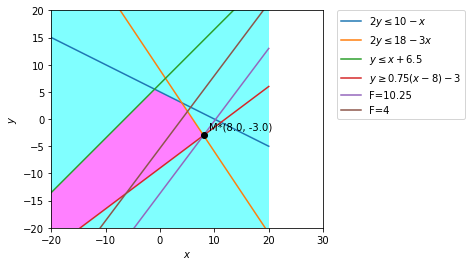

In [70]:
# https://pyprog.pro/array_creation/meshgrid.html

# отрисовка фигуры
d = np.linspace(-30,20,500)
x,y = np.meshgrid(d,d)
plt.imshow( ((2*y<=10-x) & (2*y<=18-3*x) & (y<=x+b) & (y>=c*x-8*c-3)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="cool", alpha = 0.5);

x = np.linspace(-20, 20, 2000)

# Выразим 'y' из функций из системы 'D'

# y <= (10 - x)/2
# y <= (18 - 3x)/2
# y <= x + b
# y >= cx - 8c - 3


y1 = (10-x)/2.0
y2 = (18-3*x)/2.0
y3 = x + b
y4 = c*x - 8*c - 3

y5 = max_val/a - x/a
y6 = 4/a - x/a


plt.plot(x, y1, label=r'$2y\leq 10-x$')
plt.plot(x, y2, label=r'$2y\leq 18-3x$')
plt.plot(x, y3, label=fr'$y\leq x + {b}$')
plt.plot(x, y4, label=fr'$y\geq {c}(x-8)-3$')
plt.plot(x, y5, label=f'F={max_val.round(3)}')
plt.plot(x, y6, label='F=4')

plt.xlim(-20, 30)
plt.ylim(-20,20)

plt.plot(x_1, x_2, 'ko')
plt.text(x_1 + 1, x_2 + 1, f'M*({x_1.round(3)}, {x_2.round(3)})')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.show()